<a href="https://colab.research.google.com/github/bhkpriyanka/EVA4/blob/master/Week9/QUIZ9DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-03-21 17:43:38.855428


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
import sys
sys.path.append('/content/gdrive/My Drive/EVA4_2020/Week9/PythonFiles/')
sys.path.append('/content/gdrive/My Drive/EVA4_2020/Week9/PythonFiles/Models')
sys.path.append('/content/gdrive/My Drive/EVA4_2020/Week9/PythonFiles/Transforms')
print(sys.path)

['/tensorflow-1.15.0/python3.6', '', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/content/gdrive/My Drive/EVA4_2020/Week9/PythonFiles/', '/content/gdrive/My Drive/EVA4_2020/Week9/PythonFiles/Models', '/content/gdrive/My Drive/EVA4_2020/Week9/PythonFiles/Transforms']


In [0]:
from all_imports import *
import pytorch_tfmn_dataloader as dl                         # Loading CIFAR10 data into train/test dataloaders
import QuizDNN as mfile                                 # ResNet18 Model architecture
import train_test_functions as ttfunc             # Model training and validation functions
import test_performance as tperform               # Class wise model accuracy and confusion matrix plot
import model_plots as mp                          # Plotting the Train/Test plots for loss and accuracy
import misclassified                              # Display misclassified images by the trained model

In [5]:
trainloader, testloader = dl.train_test_loaders(128, 5)   #arguments are batchsize, rotation value

Files already downloaded and verified
Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [7]:
#!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

model = mfile.get_model_instance(0.15).to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
      BatchNorm2d-10           [-1, 64, 32, 32]             128
             ReLU-11           [-1, 64, 32, 32]               0
          Dropout-12           [-1, 64, 32, 32]               0
        MaxPool2d-13           [-1, 64, 16, 16]               0
           Conv2d-14           [-1

In [8]:
model = mfile.get_model_instance(0.15).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
EPOCHS = 10
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    tra,trl = ttfunc.train(model, device, trainloader, optimizer, epoch)
    tea,tel = ttfunc.test(model, device, testloader,classes)
    scheduler.step()
    print('')


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=0.9974079132080078 Batch_id=390 Accuracy=49.14: 100%|██████████| 391/391 [00:28<00:00, 13.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0125, Accuracy: 4626/10000 (46.26%)


EPOCH: 2


Loss=0.8913763761520386 Batch_id=390 Accuracy=66.56: 100%|██████████| 391/391 [00:28<00:00, 13.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0157, Accuracy: 4275/10000 (42.75%)


EPOCH: 3


Loss=0.717605710029602 Batch_id=390 Accuracy=71.98: 100%|██████████| 391/391 [00:28<00:00, 13.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0070, Accuracy: 6768/10000 (67.68%)


EPOCH: 4


Loss=0.793477475643158 Batch_id=390 Accuracy=75.63: 100%|██████████| 391/391 [00:28<00:00, 13.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0105, Accuracy: 5566/10000 (55.66%)


EPOCH: 5


Loss=0.5912822484970093 Batch_id=390 Accuracy=77.72: 100%|██████████| 391/391 [00:28<00:00, 13.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7136/10000 (71.36%)


EPOCH: 6


Loss=0.5052761435508728 Batch_id=390 Accuracy=79.41: 100%|██████████| 391/391 [00:28<00:00, 13.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7094/10000 (70.94%)


EPOCH: 7


Loss=0.5510815382003784 Batch_id=390 Accuracy=80.92: 100%|██████████| 391/391 [00:28<00:00, 13.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0090, Accuracy: 6162/10000 (61.62%)


EPOCH: 8


Loss=0.4628832936286926 Batch_id=390 Accuracy=81.82: 100%|██████████| 391/391 [00:28<00:00, 13.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7965/10000 (79.65%)


EPOCH: 9


Loss=0.41871729493141174 Batch_id=390 Accuracy=82.94: 100%|██████████| 391/391 [00:28<00:00, 13.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7712/10000 (77.12%)


EPOCH: 10


Loss=0.6747137308120728 Batch_id=390 Accuracy=83.71: 100%|██████████| 391/391 [00:28<00:00, 13.86it/s]



Test set: Average loss: 0.0041, Accuracy: 8160/10000 (81.60%)




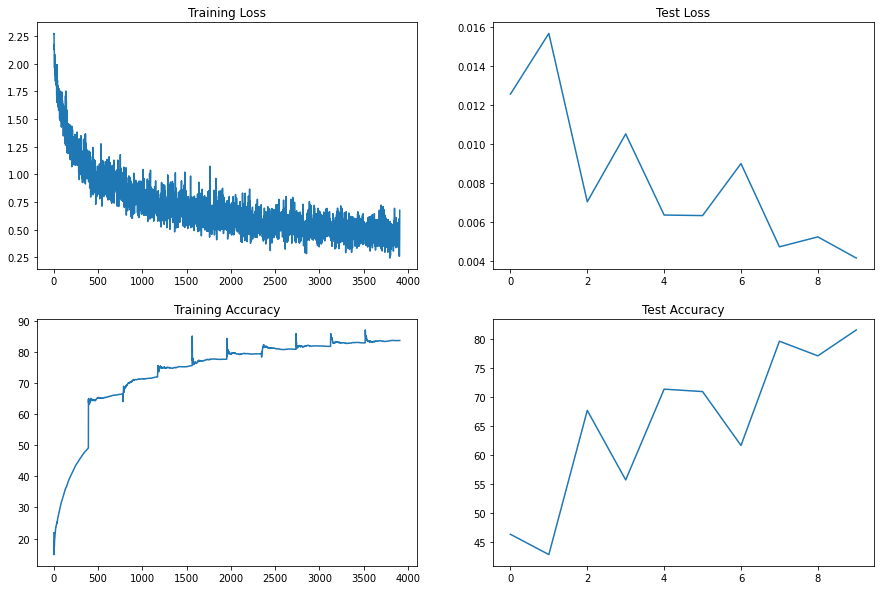

In [9]:
mp.train_test_plots(trl,tra,tel,tea)


------------------------------------------------------------
Model accuracy on 10000 test images: 81.60%
------------------------------------------------------------
 
Category   - Accuracy
plane      - 82.50
car        - 92.40
bird       - 79.70
cat        - 50.40
deer       - 73.60
dog        - 85.80
frog       - 89.40
horse      - 84.70
ship       - 93.80
truck      - 83.70
 


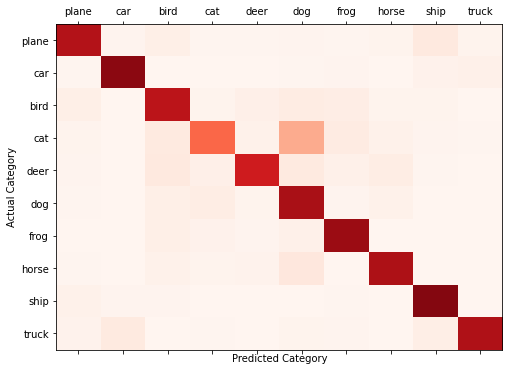

In [10]:
tperform.test_performance(model, testloader, device, classes)

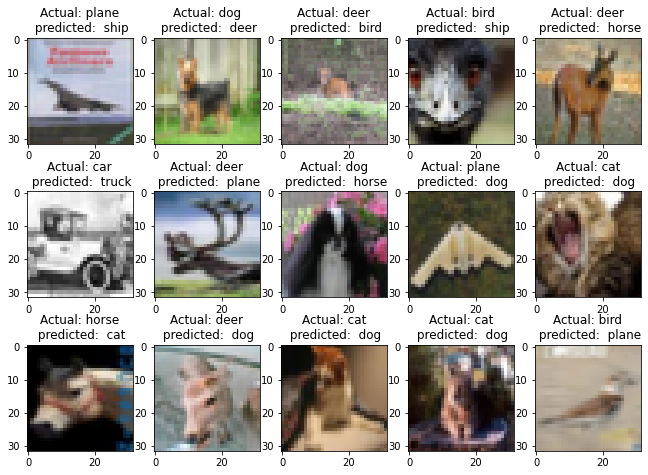

In [11]:
images, actuals, preds = misclassified.test_misclassified(model,device,testloader)
misclassified.plot_images(images, actuals, preds, classes)